# Machine Learning Model to Find Best Location For Building a Well

In this project, we created a Linear Regression Machine Learning Model for the OilyGiant company. The company provided us with oil samples from 3 different regions, in which the parameters of each oil well in the region are already known. The purpose of this mahcine learning model was to pick the region with the highest profit margin. Similarly, we analyzed the potential profit and risks using the Boostrapping technique. 

The conditions considered for this project include: 
- When exploring the region, a study of 500 points was carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 Million USD.
- One barrel of raw materials brings 4.5 USD of revenue. Therefore, the revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, we only kept the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected. 

## Libraries used for Analysis

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, roc_curve, accuracy_score, roc_auc_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats as st

## Data Used for Analysis

###  `data_geo_0` dataframe 
The `data_geo_0` dataframe had a total of 5 columns, and 100,000 rows. Each row represented details about one well in region_0. None of the columns had any null values, and the data type for all of the columns was correct. Below is the description for each of the colums in this dataframe: 
- `id` — unique oil well identifier
- `f0, f1, f2` — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- `product` — volume of reserves in the oil well (thousand barrels).

In [2]:
data_geo_0= pd.read_csv('/datasets/geo_data_0.csv')
print(data_geo_0.info())
print(data_geo_0.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


We plotted the distribution of 'product' column to observe if there were any values that would not make sense or were not representative for the distribution. E.g. Negative values or outliers. Based on the distribution, there were no outliers or negative values of volume units.

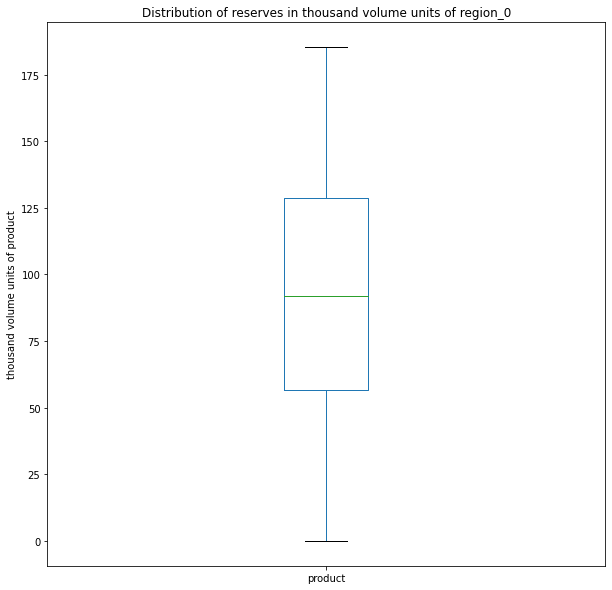

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

In [3]:
data_geo_0['product'].plot(kind='box', figsize=(10,10))
plt.ylabel('thousand volume units of product')
plt.title('Distribution of reserves in thousand volume units of region_0')
plt.show()
data_geo_0['product'].describe()

###  `data_geo_1` dataframe 
The `data_geo_1` dataframe had a total of 5 columns, and 100,000 rows. Each row represented details about one well in region_1. None of the columns had any null values, and the data type for all of the columns was correct. Below is the description for each of the colums in this dataframe: 
- `id` — unique oil well identifier
- `f0, f1, f2` — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- `product` — volume of reserves in the oil well (thousand barrels).

In [4]:
data_geo_1= pd.read_csv('/datasets/geo_data_1.csv')
print(data_geo_1.info())
print(data_geo_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


We plotted the distribution of 'product' column to observe if there were any values that would not make sense or were not representative for the distribution. E.g. Negative values or outliers. Based on the distribution, there were no outliers or negative values of volume units.

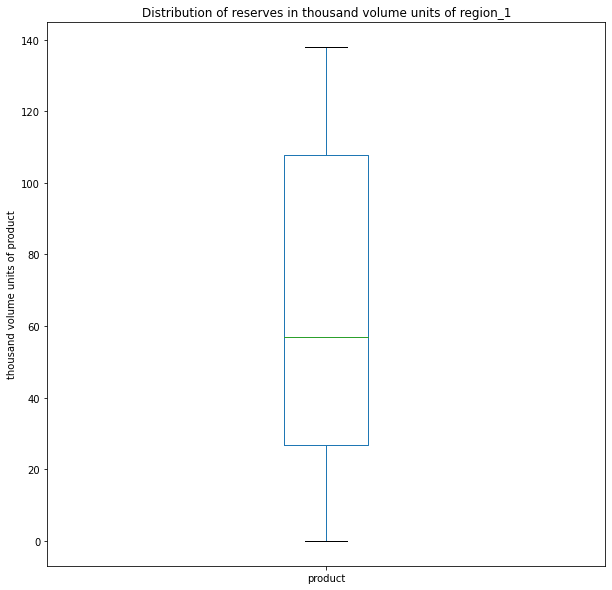

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

In [5]:
data_geo_1['product'].plot(kind='box', figsize=(10,10))
plt.ylabel('thousand volume units of product')
plt.title('Distribution of reserves in thousand volume units of region_1')
plt.show()
data_geo_1['product'].describe()

###  `data_geo_2` dataframe 
The `data_geo_2` dataframe had a total of 5 columns, and 100,000 rows. Each row represented details about one well in region_2. None of the columns had any null values, and the data type for all of the columns was correct. Below is the description for each of the colums in this dataframe: 
- `id` — unique oil well identifier
- `f0, f1, f2` — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- `product` — volume of reserves in the oil well (thousand barrels).

In [6]:
data_geo_2= pd.read_csv('/datasets/geo_data_2.csv')
print(data_geo_2.info())
print(data_geo_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


We plotted the distribution of 'product' column to observe if there were any values that would not make sense or were not representative for the distribution. E.g. Negative values or outliers. Based on the distribution, there were no outliers or negative values of volume units.

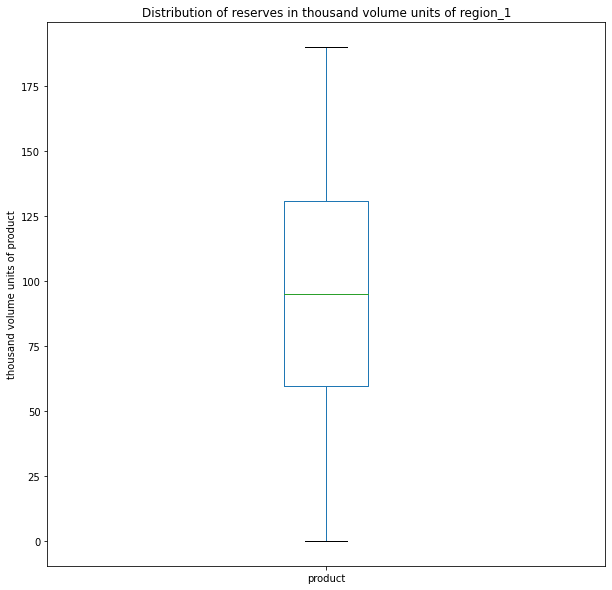

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

In [7]:
data_geo_2['product'].plot(kind='box', figsize=(10,10))
plt.ylabel('thousand volume units of product')
plt.title('Distribution of reserves in thousand volume units of region_1')
plt.show()
data_geo_2['product'].describe()

## Creating a Linear Regression Model for Each Region

In this section of the project, we created a Linear Regression model for each of the regions; we trained the model and made prediction for the validation dataset. Each of the datasets for each region was split into a training and validation dataset in a 3:1 ratio. 

### data_geo_0 Linear Regression Model

In [8]:
features_0=data_geo_0.drop(['id','product'],axis=1)
target_0=data_geo_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, train_size=0.75, random_state=12345)


print(f'features_train:      {features_train_0.shape}')
print(f'target_train:        {target_train_0.shape}')

print(f'features_validation: {features_valid_0.shape}')
print(f'target_validation:   {target_valid_0.shape}')




features_train:      (75000, 3)
target_train:        (75000,)
features_validation: (25000, 3)
target_validation:   (25000,)


In [9]:
#training the linear regression model and predicting the validation set. 
lr_model_0=LinearRegression()
lr_model_0.fit(features_train_0,target_train_0)
print('Linear Regression lr_model_0 Trained!')
predicted_valid_0=lr_model_0.predict(features_valid_0)
print('Validation set for region_0 set predicted!')

#saving the predicted and correct asnwers validation set as separate Dataframe
correct_valid_0=pd.Series(target_valid_0)

predicted_valid_0=pd.Series(predicted_valid_0)
predicted_valid_0.index=correct_valid_0.index
#new dataframe with correct and predicted validation

valid_correct_predicted_0=pd.concat([correct_valid_0,predicted_valid_0], axis=1)
valid_correct_predicted_0.columns=['correct_0', 'predicted_0']
#printing head(10) of predictions and correct answers
print
valid_correct_predicted_0.head(10)

Linear Regression lr_model_0 Trained!
Validation set for region_0 set predicted!


,correct_0,predicted_0
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
9539,37.735331,69.127076
8482,139.227191,125.106759
30284,72.491987,87.643849
66393,11.465993,86.035871
99584,110.562031,98.655311


#### Analyzing the Linear Regression Model Results for predicted validation set

In this section, we analyzed the distribution from the predicted validation set using the lr_model_0 linear regression model. From the description of distribution below, we obtained an average value of 92.59 thousand volume units of product; a median value of 92.66 thousand volume units of product; a standard deviation value of 23.18 thousand volume units of product; a maximum and minimum value of 180.18 and -9.367 thousand volume units of product, respectively. A negative value of volume units does not make sense in this scenario, as we cannot have negative values of volume in a reserve.

In [10]:
#computing the average predicted volume
print('Distribution of predicted validation set')
print(valid_correct_predicted_0.predicted_0.describe())


Distribution of predicted validation set
count    25000.000000
mean        92.592568
std         23.176994
min         -9.367846
25%         76.652232
50%         92.661884
75%        108.437632
max        180.180713
Name: predicted_0, dtype: float64


The Root Mean Squared Error value for our predicted values was 37.58 thousand volume units of product. Meaning that on average our predictions were off by 37.57 thousand volume units of product. 

In [11]:
mean_squared_error_0=mean_squared_error(target_valid_0,predicted_valid_0)
root_mean_squared_error_0=mean_squared_error_0**0.5

print(f'Root Mean Squared Error: {root_mean_squared_error_0}')


Root Mean Squared Error: 37.5794217150813


The coefficient of determination, R2 score, for our predicted values was 0.27, meaning that 27.99% of the variance of the amount of product in volume units being studied is explained by the variance of the features(f0,f1,f2) in our model. 

In [12]:
r2_score_0=r2_score(target_valid_0,predicted_valid_0)
print('R2 score: ', r2_score_0)

R2 score:  0.27994321524487786


From the boxplot, we observed that our distribution was very close to be normal distrubuted as the mean and the median values were 92.59 and 92.66 thousand volume units of product, respectively. However, we found outliers in our distribution higher and lower than 1.5*iqr. The predicted distribution had a lower 1.5*iqr bound of 28.97 thousand volume units of product, and an upper 1.5*iqr boun of 156.11. 


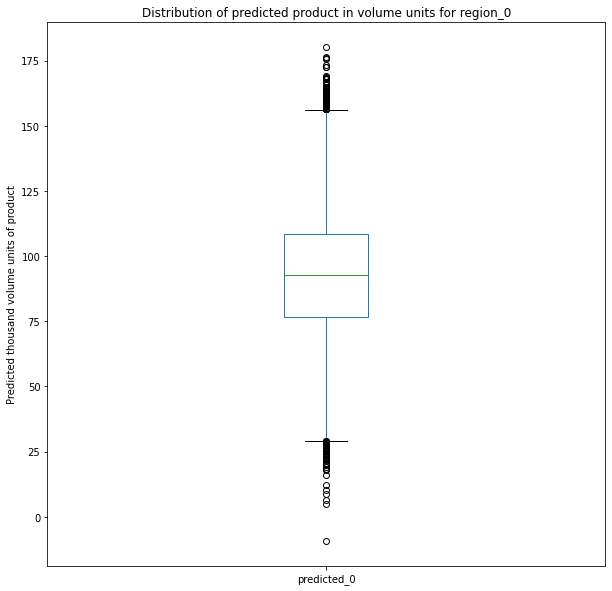

In [13]:
valid_correct_predicted_0.predicted_0.plot(kind='box', figsize=(10,10))
plt.ylabel('Predicted thousand volume units of product')
plt.title('Distribution of predicted product in volume units for region_0')
plt.show()

In [14]:
q1_0=valid_correct_predicted_0.predicted_0.quantile(0.25)
q3_0=valid_correct_predicted_0.predicted_0.quantile(0.75)
iqr_0=q3_0 -q1_0
lower_0=q1_0-(1.5*iqr_0)
upper_0=q3_0+(1.5*iqr_0)
print('lower bound 1.5*iqr:', lower_0)
print('upper bound 1.5*iqr:', upper_0)

lower bound 1.5*iqr: 28.974131913853157
upper bound 1.5*iqr: 156.1157323960382


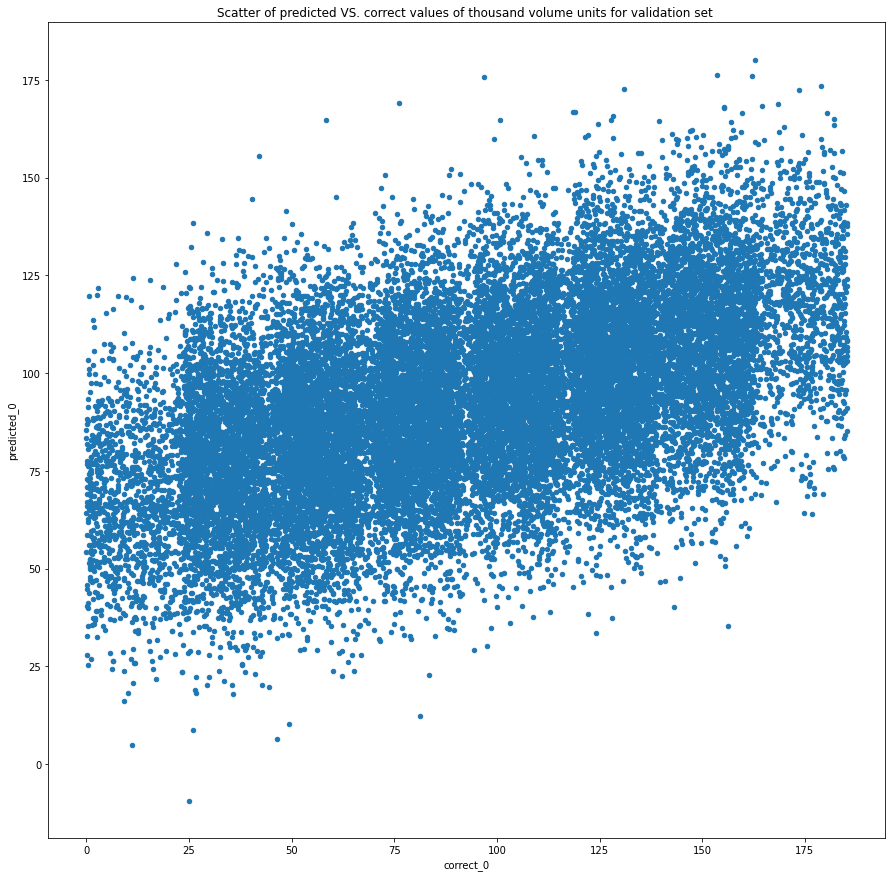

In [15]:
#scatter plot summarizing the relationship between predicted versus predicted values of thousand volume units of produce
# in region_0
valid_correct_predicted_0.plot(x='correct_0',y='predicted_0',kind='scatter', figsize=(15,15))
plt.title('Scatter of predicted VS. correct values of thousand volume units for validation set ')
plt.show()

### data_geo_1 Linear Regression Model

In [16]:
#splitting the dataset of region into training and validation dataset in a 3:1 ratio
features_1=data_geo_1.drop(['id','product'],axis=1)
target_1=data_geo_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, train_size=0.75, random_state=12345)


print(f'features_train:      {features_train_1.shape}')
print(f'target_train:        {target_train_1.shape}')

print(f'features_validation: {features_valid_1.shape}')
print(f'target_validation:   {target_valid_1.shape}')

features_train:      (75000, 3)
target_train:        (75000,)
features_validation: (25000, 3)
target_validation:   (25000,)


In [17]:
#training the linear regression model and predicting the validation set. 
lr_model_1=LinearRegression()
lr_model_1.fit(features_train_1,target_train_1)
print('Linear Regression lr_model_1 Trained!')
predicted_valid_1=lr_model_1.predict(features_valid_1)
print('Validation set for region_1 set predicted!')

#saving the predicted and correct asnwers validation set as separate Dataframe
correct_valid_1=pd.Series(target_valid_1)

predicted_valid_1=pd.Series(predicted_valid_1)
predicted_valid_1.index=correct_valid_1.index
#new dataframe with correct and predicted validation

valid_correct_predicted_1=pd.concat([correct_valid_1,predicted_valid_1], axis=1)
valid_correct_predicted_1.columns=['correct_1', 'predicted_1']
#printing head(10) of predictions and correct answers

valid_correct_predicted_1.head(10)

Linear Regression lr_model_1 Trained!
Validation set for region_1 set predicted!


,correct_1,predicted_1
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
9539,110.992147,111.438490
8482,137.945408,137.134374
30284,84.038886,82.888902
66393,110.992147,110.897311
99584,26.953261,29.219306


#### Analyzing the Linear Regression Model Results for predicted validation set

In this section, we analyzed the distribution from the predicted validation set using the lr_model_1 linear regression model. From the description of distribution below, we obtained an average value of 68.72 thousand volume units of product; a median value of 57.85 thousand volume units of product; a standard deviation value of 46.01 thousand volume units of product; a maximum and minimum value of 139.81 and -1.89 thousand volume units of product, respectively. A negative value of volume units does not make sense in this scenario, as we cannot have negative values of volume in a reserve.

In [18]:
#computing the average predicted volume
print('Distribution of predicted validation set')
print(valid_correct_predicted_1.predicted_1.describe())

Distribution of predicted validation set
count    25000.000000
mean        68.728547
std         46.010225
min         -1.893774
25%         28.536661
50%         57.851586
75%        109.346485
max        139.818970
Name: predicted_1, dtype: float64


The Root Mean Squared Error value for our predicted values was 0.893 thousand volume units of product. Meaning that on average our predictions were off by 0.89 thousand volume units of product. 

In [19]:
mean_squared_error_1=mean_squared_error(target_valid_1,predicted_valid_1)
root_mean_squared_error_1=mean_squared_error_1**0.5

print(f'Root Mean Squared Error: {root_mean_squared_error_1}')

Root Mean Squared Error: 0.893099286775617


The coefficient of determination, R2 score, for our predicted values was 0.99, meaning that 99.96% of the variance of the amount of product in volume units being studied is explained by the variance of the features(f0,f1,f2) in our model.

In [20]:
r2_score_1=r2_score(target_valid_1,predicted_valid_1)
print('R2 score: ', r2_score_1)

R2 score:  0.9996233978805127


From the boxplot, we observed that our distribution was positively skewed distrubuted as the mean and the median values were 68.72 and 57.85 thousand volume units of product, respectively. We found outliers in our distribution higher and lower than 1.5*iqr. The predicted distribution had a lower 1.5*iqr bound of -92.67 thousand volume units of product, and an upper 1.5*iqr bound of 230.56. 

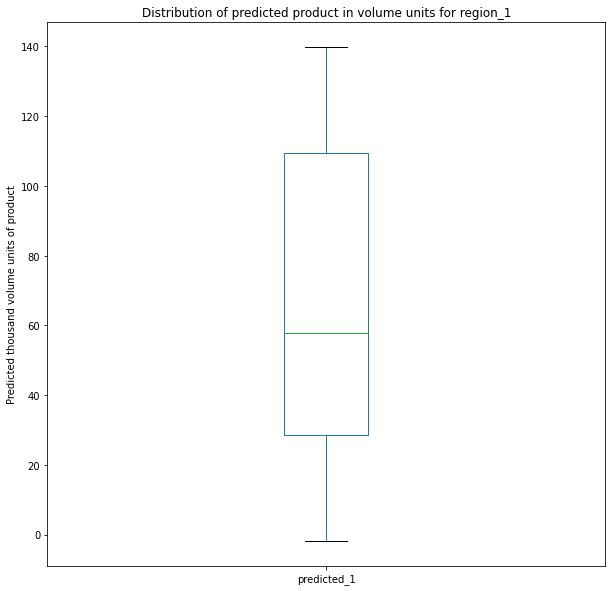

In [21]:
valid_correct_predicted_1.predicted_1.plot(kind='box', figsize=(10,10))
plt.ylabel('Predicted thousand volume units of product')
plt.title('Distribution of predicted product in volume units for region_1')
plt.show()

In [22]:
q1_1=valid_correct_predicted_1.predicted_1.quantile(0.25)
q3_1=valid_correct_predicted_1.predicted_1.quantile(0.75)
iqr_1=q3_1 -q1_1
lower_1=q1_1-(1.5*iqr_1)
upper_1=q3_1+(1.5*iqr_1)
print('lower bound 1.5*iqr:', lower_1)
print('upper bound 1.5*iqr:', upper_1)

lower bound 1.5*iqr: -92.67807509548388
upper bound 1.5*iqr: 230.56122131700317


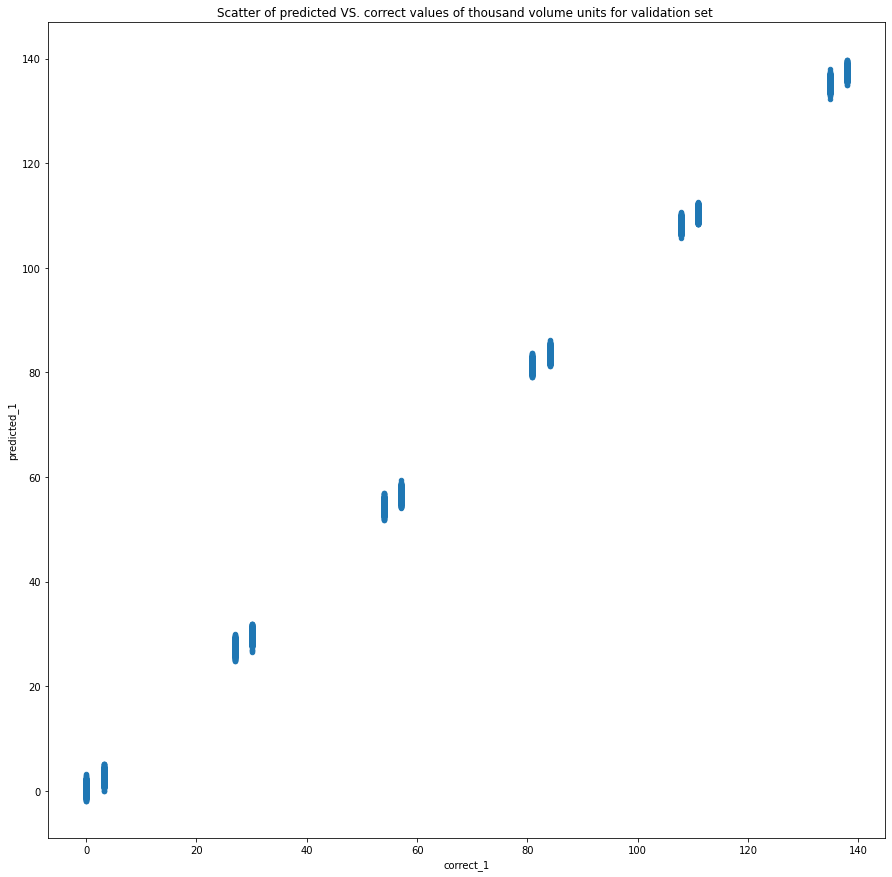

In [23]:
#scatter plot summarizing the relationship between predicted versus predicted values of thousand volume units of produce
# in region_1
valid_correct_predicted_1.plot(x='correct_1',y='predicted_1',kind='scatter', figsize=(15,15))
plt.title('Scatter of predicted VS. correct values of thousand volume units for validation set ')
plt.show()

### data_geo_2 Linear Regression Model

In [24]:
#splitting the dataset of region into training and validation dataset in a 3:1 ratio
features_2=data_geo_2.drop(['id','product'],axis=1)
target_2=data_geo_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, train_size=0.75, random_state=12345)


print(f'features_train:      {features_train_2.shape}')
print(f'target_train:        {target_train_2.shape}')

print(f'features_validation: {features_valid_2.shape}')
print(f'target_validation:   {target_valid_2.shape}')

features_train:      (75000, 3)
target_train:        (75000,)
features_validation: (25000, 3)
target_validation:   (25000,)


In [25]:
#training the linear regression model and predicting the validation set. 
lr_model_2=LinearRegression()
lr_model_2.fit(features_train_2,target_train_2)
print('Linear Regression lr_model_2 Trained!')
predicted_valid_2=lr_model_2.predict(features_valid_2)
print('Validation set for region_2 set predicted!')


#saving the predicted and correct asnwers validation set as separate Dataframe
correct_valid_2=pd.Series(target_valid_2)

predicted_valid_2=pd.Series(predicted_valid_2)
predicted_valid_2.index=correct_valid_2.index
#new dataframe with correct and predicted validation

valid_correct_predicted_2=pd.concat([correct_valid_2,predicted_valid_2], axis=1)
valid_correct_predicted_2.columns=['correct_2', 'predicted_2']
#printing head(10) of predictions and correct answers

valid_correct_predicted_2.head(10)

Linear Regression lr_model_2 Trained!
Validation set for region_2 set predicted!


,correct_2,predicted_2
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
9539,105.904629,121.939197
8482,51.646180,119.053040
30284,173.162121,75.396575
66393,113.143072,111.400543
99584,56.803215,84.029320


#### Analyzing the Linear Regression Model Results for predicted validation set

In this section, we analyzed the distribution from the predicted validation set using the lr_model_2 linear regression model. From the description of distribution below, we obtained an average value of 94.97 thousand volume units of product; a median value of 95.03 thousand volume units of product; a standard deviation value of 19.85 thousand volume units of product; a maximum and minimum value of 165.85 and 17.13 thousand volume units of product, respectively. 

In [26]:
#computing the average predicted volume
print('Distribution of predicted validation set')
print(valid_correct_predicted_2.predicted_2.describe())

Distribution of predicted validation set
count    25000.000000
mean        94.965046
std         19.853733
min         17.131597
25%         81.388500
50%         95.031204
75%        108.492663
max        165.856833
Name: predicted_2, dtype: float64


The Root Mean Squared Error value for our predicted values was 40.03 thousand volume units of product. Meaning that on average our predictions were off by 40.03 thousand volume units of product. 

In [27]:
mean_squared_error_2=mean_squared_error(target_valid_2,predicted_valid_2)
root_mean_squared_error_2=mean_squared_error_2**0.5

print(f'Root Mean Squared Error: {root_mean_squared_error_2}')

Root Mean Squared Error: 40.02970873393434


The coefficient of determination, R2 score, for our predicted values was 0.205, meaning that 20.52% of the variance of the amount of product in volume units being studied is explained by the variance of the features(f0,f1,f2) in our model.

In [28]:
r2_score_2=r2_score(target_valid_2,predicted_valid_2)
print('R2 score: ', r2_score_2)

R2 score:  0.20524758386040443


From the boxplot, we observed that our distribution was almost normally distrubuted as the mean and the median values were 94.97 and 95.03 thousand volume units of product, respectively. We found outliers in our distribution higher and lower than 1.5*iqr. The predicted distribution had a lower 1.5*iqr bound of 40.73 thousand volume units of product, and an upper 1.5*iqr bound of 149.14. 

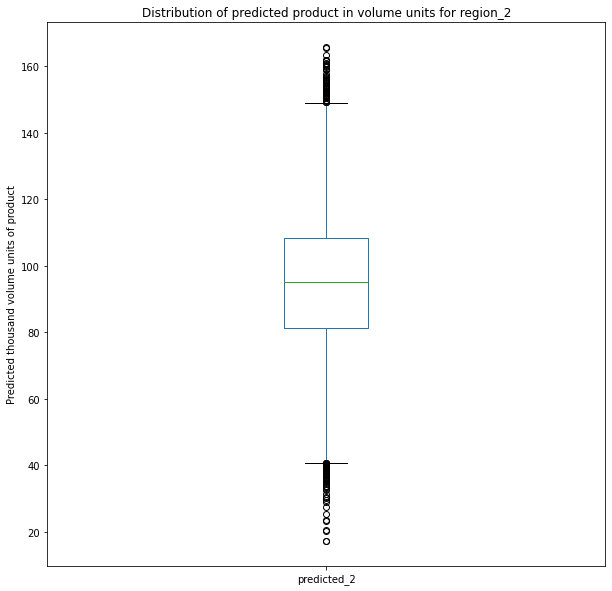

In [29]:
valid_correct_predicted_2.predicted_2.plot(kind='box', figsize=(10,10))
plt.ylabel('Predicted thousand volume units of product')
plt.title('Distribution of predicted product in volume units for region_2')
plt.show()

In [30]:
q1_2=valid_correct_predicted_2.predicted_2.quantile(0.25)
q3_2=valid_correct_predicted_2.predicted_2.quantile(0.75)
iqr_2=q3_2 -q1_2
lower_2=q1_2-(1.5*iqr_2)
upper_2=q3_2+(1.5*iqr_2)
print('lower bound 1.5*iqr:', lower_2)
print('upper bound 1.5*iqr:', upper_2)

lower bound 1.5*iqr: 40.73225411264803
upper bound 1.5*iqr: 149.1489084838953


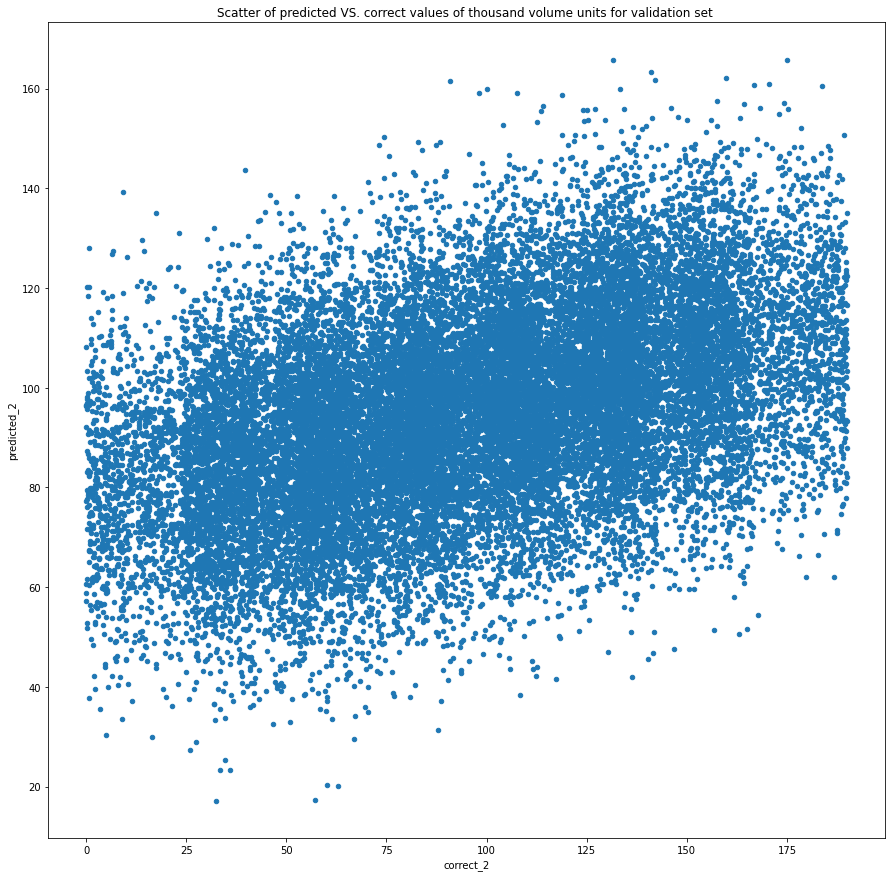

In [31]:
#scatter plot summarizing the relationship between predicted versus predicted values of thousand volume units of produce
# in region_2
valid_correct_predicted_2.plot(x='correct_2',y='predicted_2',kind='scatter', figsize=(15,15))
plt.title('Scatter of predicted VS. correct values of thousand volume units for validation set ')
plt.show()

## Sufficient volume units of reserve for profit
In this section, we calculated the volume of reserves sufficient for developing a new well without losses. Since the budget to build 200 wells is 100,000,000 USD. Then, to calculate the average volume units needed per well, we divided the budget by the revenue per volume unit, which is 4,500 USD, as shown below:

In [32]:
#budget, stored in cost_of_200_wells, is in units of USD
cost_of_200_wells=100000000
#revenue per volume unit, stored in revenue_per_vol_unit, is in units of USD/volume_unit
revenue_per_vol_unit=4500
# the sufficient_vol_unit is un units of volume units, and result describes the sufficient volume units needed 
#on average per well to prevent losses. 
sufficient_vol_unit=cost_of_200_wells/revenue_per_vol_unit/200

print('Average of volume units needed per well to avoid loss: ', sufficient_vol_unit)

Average of volume units needed per well to avoid loss:  111.11111111111111


In [33]:
print('predicted average volume units per well in region_0',valid_correct_predicted_0.predicted_0.mean())
print('predicted average volume units per well in region_1',valid_correct_predicted_1.predicted_1.mean())
print('predicted average volume units per well in region_2',valid_correct_predicted_2.predicted_2.mean())

predicted average volume units per well in region_0 92.59256778438035
predicted average volume units per well in region_1 68.728546895446
predicted average volume units per well in region_2 94.96504596800489


Based on our predicted average volume units of product for regions 0,1, and 2. We found that none of these region have, on average, none of the regions have enough volume units in reserve to build a well. However, in the section below, we selected the predictions of volume units of product that were higher than 75% quartile of volume units of product. From these samples, we found that all of the regions had, on average, the target volume units of product to prevent loss. Similarly, from these samples, we used the boostrapping tecnique to select samples of 500 wells and selected the highest 200 prediction to calculate the average gross profit, gross profit margin and the average volume units in reserves. For the predicted values higher than 75 quartile after applying the bootstrapping technique, we found the following findings shown below. From These observations, we suggest that region 1 should be the region selected for oil wells development since this region presented, from the boostraping method, on average, a higher volume units of product; a higher, on average, gross profit margin; and a higher, on everage, gross profit margin compared to regions 0 and 2. 

|region  | average gross profit (USD) | average gross profit margin | average volume per well |
|--------|----------------------------|-----------------------------|-------------------------|
|Region 0|1.977462e+07                |0.165065                     |133.08                   |
|Region 1|2.353659e+07                |0.190523                     |137.26                   |
|Region 2|1.667743e+07                |0.142910                     |129.64                   |

In [34]:
#region_0
state=np.random.RandomState(12345)
highest_75quant_0=valid_correct_predicted_0.query('predicted_0>predicted_0.quantile(.75)')['predicted_0']
highest_75quant_0

gross_profit_75quant_0=[]
gross_margin_75quant_0=[]
average_volume_75quant_0=[]

for i in range(1000):
    exploring_sample=highest_75quant_0.sample(replace=True, random_state=state,n=500)
    highest_200=exploring_sample.sort_values(ascending=False).head(200)
    revenue=sum(highest_200)*4500
    gross_profit=revenue-1e8
    average_volume_units=highest_200.mean()
    average_volume_75quant_0.append(average_volume_units)
    gross_profit_75quant_0.append(gross_profit)
    gross_margin_75quant_0.append(gross_profit/revenue)
    
gross_profit_75quant_0=pd.Series(gross_profit_75quant_0)
gross_margin_75quant_0=pd.Series(gross_margin_75quant_0)
average_volume_75quant_0=pd.Series(average_volume_75quant_0)
print('Distribution of Gross Profit')
print(gross_profit_75quant_0.describe())
print()
print()
print('Distribution of Gross Profit Margin')
print(gross_margin_75quant_0.describe())
print()
print()
print('Average volume units in reserved with 75 quantile and higher predictions')
average_volume_75quant_0.mean()

Distribution of Gross Profit
count    1.000000e+03
mean     1.977462e+07
std      7.616866e+05
min      1.627927e+07
25%      1.926086e+07
50%      1.974145e+07
75%      2.026794e+07
max      2.227422e+07
dtype: float64


Distribution of Gross Profit Margin
count    1000.000000
mean        0.165065
std         0.005308
min         0.140001
25%         0.161502
50%         0.164867
75%         0.168523
max         0.182166
dtype: float64


Average volume units in reserved with 75 quantile and higher predictions


133.0829067575381

In [35]:
#region_1
highest_75quant_1=valid_correct_predicted_1.query('predicted_1>predicted_1.quantile(.75)')['predicted_1']
highest_75quant_1

gross_profit_75quant_1=[]
gross_margin_75quant_1=[]
average_volume_75quant_1=[]

for i in range(1000):
    exploring_sample=highest_75quant_1.sample(replace=True, random_state=state,n=500)
    highest_200=exploring_sample.sort_values(ascending=False).head(200)
    revenue=sum(highest_200)*4500
    gross_profit=revenue-1e8
    average_volume_units=highest_200.mean()
    average_volume_75quant_1.append(average_volume_units)
    gross_profit_75quant_1.append(gross_profit)
    gross_margin_75quant_1.append(gross_profit/revenue)
    
gross_profit_75quant_1=pd.Series(gross_profit_75quant_1)
gross_margin_75quant_1=pd.Series(gross_margin_75quant_1)
average_volume_75quant_1=pd.Series(average_volume_75quant_1)
print('Distribution of Gross Profit')
print(gross_profit_75quant_1.describe())
print()
print()
print('Distribution of Gross Profit Margin')
print(gross_margin_75quant_1.describe())
print()
print()
print('Average volume units in reserved with 75 quantile and higher predictions')
average_volume_75quant_1.mean()

Distribution of Gross Profit
count    1.000000e+03
mean     2.353659e+07
std      8.598739e+04
min      2.329933e+07
25%      2.347825e+07
50%      2.353831e+07
75%      2.359642e+07
max      2.381154e+07
dtype: float64


Distribution of Gross Profit Margin
count    1000.000000
mean        0.190523
std         0.000563
min         0.188966
25%         0.190141
50%         0.190534
75%         0.190915
max         0.192321
dtype: float64


Average volume units in reserved with 75 quantile and higher predictions


137.26287236111105

In [36]:
#region_2
highest_75quant_2=valid_correct_predicted_2.query('predicted_2>predicted_2.quantile(.75)')['predicted_2']
highest_75quant_2

gross_profit_75quant_2=[]
gross_margin_75quant_2=[]
average_volume_75quant_2=[]

for i in range(1000):
    exploring_sample=highest_75quant_2.sample(replace=True, random_state=state,n=500)
    highest_200=exploring_sample.sort_values(ascending=False).head(200)
    revenue=sum(highest_200)*4500
    gross_profit=revenue-1e8
    average_volume_units=highest_200.mean()
    average_volume_75quant_2.append(average_volume_units)
    gross_profit_75quant_2.append(gross_profit)
    gross_margin_75quant_2.append(gross_profit/revenue)
    
gross_profit_75quant_2=pd.Series(gross_profit_75quant_2)
gross_margin_75quant_2=pd.Series(gross_margin_75quant_2)
average_volume_75quant_2=pd.Series(average_volume_75quant_2)
print('Distribution of Gross Profit')
print(gross_profit_75quant_2.describe())
print()
print()
print('Distribution of Gross Profit Margin')
print(gross_margin_75quant_2.describe())
print()
print()
print('Average volume units in reserved with 75 quantile and higher predictions')
average_volume_75quant_2.mean()

Distribution of Gross Profit
count    1.000000e+03
mean     1.667844e+07
std      6.525690e+05
min      1.464294e+07
25%      1.626068e+07
50%      1.668304e+07
75%      1.710346e+07
max      1.918853e+07
dtype: float64


Distribution of Gross Profit Margin
count    1000.000000
mean        0.142917
std         0.004792
min         0.127726
25%         0.139864
50%         0.142977
75%         0.146054
max         0.160993
dtype: float64


Average volume units in reserved with 75 quantile and higher predictions


129.6427109150636

## Risk and Profit

In this section, we used the technique a bootstrapping alogorith to predict the average gross profit, average gross profit margin, a 95% confidence interval for gross profit and gross margin, and also to calculate the risk of losses percentages for each region. The bootstrapping alhorithm entailed the following:

1. From previous sections, we obtained 25000 predicted and 25000 real values for each region, saved in the valid_correct_predicted_n dataframe, where n is the number of the region. 
-  Using a bootstrap, we randomly select 500 points out of the 25000 and pass them into function for gross profit and gross profit margin calculation. This function select best 200 wells by predicted values.
-  After that, we calculated revenue by using the values of correct values of corresponding wells.
-  At the end of this function we calculate gross profit (revenue-costs), and gross profit margin (gross profit/revenue).
2. We run 1000 times the algorithm that is described above [each time 500 random wells out of 25000, select highest 200 predicted, and use the corresponding correct values]; add all of the correct values and pass the sum to the gross profit function and gross profit margin function; the result is added to the lists: gross_profit_n and gross_margin_n. 


After applying the boostrap algorithm, we calculated mean profit and gross margin of this list, the risk of losses (percentage of negative values in this list), and confidence interval ( 0.025 and 0.975 quantiles of these list).

### Region_0

After applying bootstrapping method for region_0, we obtained a distribution for the gross profit with a mean value of 3.96 Million USD; a median value of 3.95 Million USD; a standard deviation value of 2.66 Million USD. For the gross margin distribution we obtained a mean value of 0.16; a median value of 0.16; and a standard deviation value of 0.004. The boxplot depicting the distribution of gross profit margin showed that the distribution was nearly normally distributed, and that there were values that were greater and smaller than 1.5*IQR. Similarly, the distribution for gross profit was positively skewed and presented values greater and smaller than 1.5*IQR.

In [37]:
state=np.random.RandomState(12345)
gross_profit_0=[]
gross_margin_0=[]


for i in range(1000):
    exploring_sample=valid_correct_predicted_0.predicted_0.sample(replace=True, random_state=state,n=500)
    
    highest_200_predicted=exploring_sample.sort_values(ascending=False).head(200)
    highest_200_correct=valid_correct_predicted_0.loc[highest_200_predicted.index]['correct_0']
    
    revenue=sum(highest_200_correct)*4500
    profit=revenue-1e8
    gross_profit_0.append(profit)
    gross_margin_0.append(profit/revenue)
    
gross_profit_0=pd.Series(gross_profit_0)
gross_margin_0=pd.Series(gross_margin_0)
print('Distribution of Gross Profit')
print(gross_profit_0.describe())
print('Distribution of Gross Profit Margin')
print(gross_margin_0.describe())




Distribution of Gross Profit
count    1.000000e+03
mean     3.961650e+06
std      2.666143e+06
min     -3.695671e+06
25%      2.139204e+06
50%      3.950089e+06
75%      5.793003e+06
max      1.349267e+07
dtype: float64
Distribution of Gross Profit Margin
count    1000.000000
mean        0.037474
std         0.024716
min        -0.038375
25%         0.020944
50%         0.038000
75%         0.054758
max         0.118886
dtype: float64


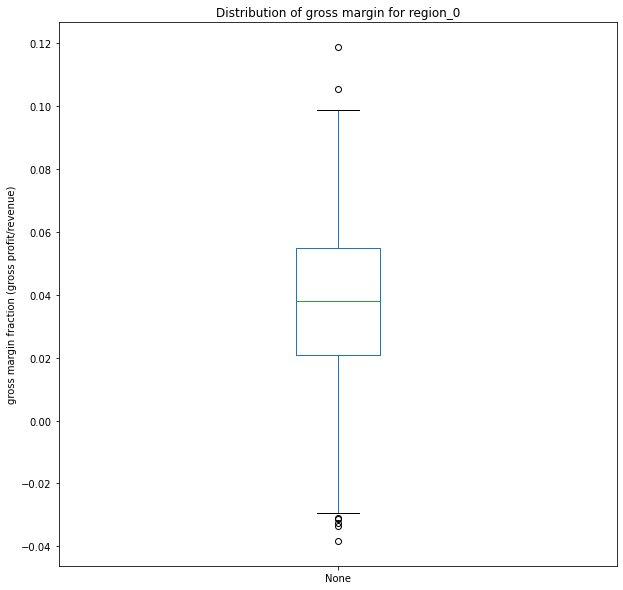

In [38]:
gross_margin_0.plot(kind='box', figsize=(10,10))
plt.ylabel('gross margin fraction (gross profit/revenue)')
plt.title('Distribution of gross margin for region_0')
plt.show()

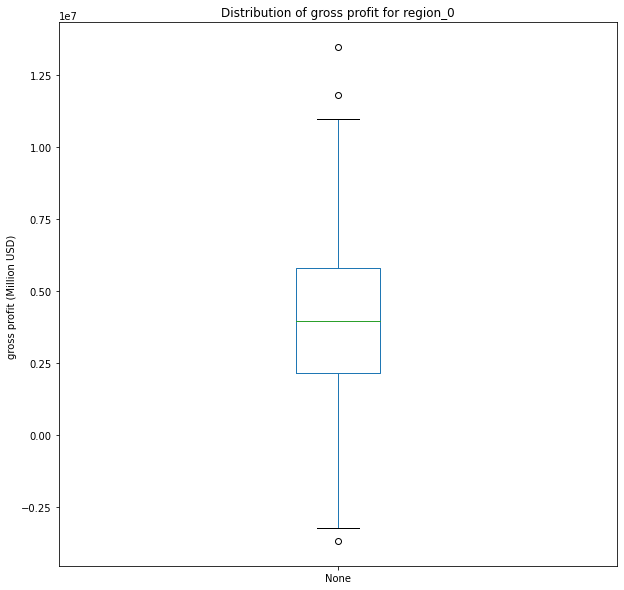

In [39]:
gross_profit_0.plot(kind='box', figsize=(10,10))
plt.ylabel('gross profit (Million USD) ')
plt.title('Distribution of gross profit for region_0')
plt.show()

In this section, we analyzed the risk of loss percentage and 95% confidence interval for gross profit and gross profit margin for egion_0. For region_0, we calculated that there was a 6.9% risk of negative profit profit margin. Also, the 95% confidence interval for gross margin profit was  (-0.0112, 0.0833); and the the 95% confidence interval for gross profit was (-1112155.45 ,9097669.41)

In [40]:
#calculating risk percentage
risk_count_0=0
for i in gross_margin_0:
    if i <0:
        risk_count_0 +=1

print(f'Risk percentage {(risk_count_0/len(gross_margin_0))*100}%')

Risk percentage 6.9%


In [41]:
print(f'gross profit 95% C.I.: ({gross_profit_0.quantile(0.025)} , {gross_profit_0.quantile(0.975)})')
print(f'gross profit margin 95% C.I.: ({gross_margin_0.quantile(0.025)} , {gross_margin_0.quantile(0.975)})')

gross profit 95% C.I.: (-1112155.4589049455 , 9097669.415534215)
gross profit margin 95% C.I.: (-0.011246634731738508 , 0.08339012513092836)


### Region_1

After applying bootstrapping to predicted volume units for region_1, we obtained a distribution for the gross profit with a mean value of 4.56 Million USD; a median value of 4.57 Million USD; a standard deviation value of 2.07 Million USD. For the gross margin distribution we obtained a mean value of 0.04; a median value of 0.043; and a standard deviation value of 0.019. The boxplot depicting the distribution of gross profit margin showed that the distribution was nearly normally distributed, and that there were values that were greater and smaller than 1.5*IQR. Similarly, the distribution for gross profit was negatiely skewed and presented values greater and smaller than 1.5*IQR.

In [42]:
state=np.random.RandomState(12345)
gross_profit_1=[]
gross_margin_1=[]


for i in range(1000):
    exploring_sample=valid_correct_predicted_1.predicted_1.sample(replace=True, random_state=state,n=500)
    
    highest_200_predicted=exploring_sample.sort_values(ascending=False).head(200)
    highest_200_correct=valid_correct_predicted_1.loc[highest_200_predicted.index]['correct_1']
    
    revenue=sum(highest_200_correct)*4500
    profit=revenue-1e8
    gross_profit_1.append(profit)
    gross_margin_1.append(profit/revenue)
    
gross_profit_1=pd.Series(gross_profit_1)
gross_margin_1=pd.Series(gross_margin_1)
print('Distribution of Gross Profit')
print(gross_profit_1.describe())
print('Distribution of Gross Profit Margin')
print(gross_margin_1.describe())


Distribution of Gross Profit
count    1.000000e+03
mean     4.560451e+06
std      2.078466e+06
min     -1.922681e+06
25%      3.250479e+06
50%      4.570359e+06
75%      5.989760e+06
max      1.154047e+07
dtype: float64
Distribution of Gross Profit Margin
count    1000.000000
mean        0.043237
std         0.019049
min        -0.019604
25%         0.031481
50%         0.043706
75%         0.056513
max         0.103464
dtype: float64


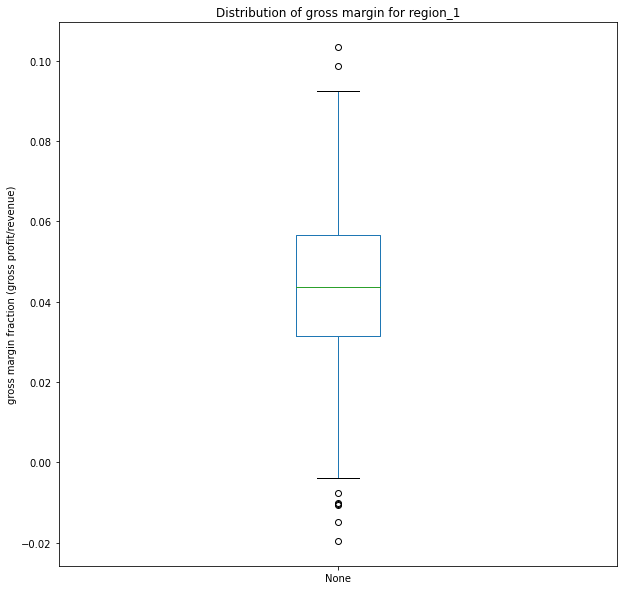

In [43]:
gross_margin_1.plot(kind='box', figsize=(10,10))
plt.ylabel('gross margin fraction (gross profit/revenue)')
plt.title('Distribution of gross margin for region_1')
plt.show()

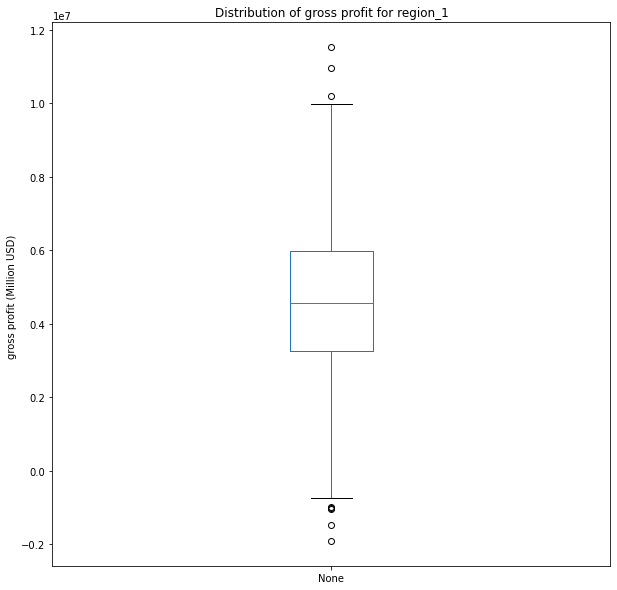

In [44]:
gross_profit_1.plot(kind='box', figsize=(10,10))
plt.ylabel('gross profit (Million USD) ')
plt.title('Distribution of gross profit for region_1')
plt.show()

In this section, we analyzed the risk of loss percentage and 95% confidence interval for gross profit and gross profit margin for region_1. For region_1, we calculated that there was a 1.5% risk of negative profit profit margin. Also, the 95% confidence interval for gross margin profit was  (0.0033, 0.078); and the the 95% confidence interval for gross profit was (338205.09 , 8522894.53)

In [45]:
#calculating risk percentage
risk_count_1=0
for i in gross_margin_1:
    if i <0:
        risk_count_1 +=1

print(f'Risk percentage {(risk_count_1/len(gross_margin_1))*100}%')

Risk percentage 1.5%


In [46]:
print(f'gross profit 95% C.I.: ({gross_profit_1.quantile(0.025)} , {gross_profit_1.quantile(0.975)})')
print(f'gross profit margin 95% C.I.: ({gross_margin_1.quantile(0.025)} , {gross_margin_1.quantile(0.975)})')

gross profit 95% C.I.: (338205.0939900089 , 8522894.538660616)
gross profit margin 95% C.I.: (0.003370649334872877 , 0.07853545127541393)


### Region_2

After applying bootstrapping to predicted volume units for region_2, we obtained a distribution for the gross profit with a mean value of 4.04 Million USD; a median value of 4.07 Million USD; a standard deviation value of 2.73 Million USD. For the gross margin distribution we obtained a mean value of 0.038; a median value of 0.039; and a standard deviation value of 0.025. The boxplot depicting the distribution of gross profit margin showed that the distribution was nearly normally distributed, and that there were values that were greater and smaller than 1.5*IQR. Similarly, the distribution for gross profit was positively skewed and presented values greater and smaller than 1.5*IQR.

In [47]:
state=np.random.RandomState(12345)
gross_profit_2=[]
gross_margin_2=[]


for i in range(1000):
    exploring_sample=valid_correct_predicted_2.predicted_2.sample(replace=True, random_state=state,n=500)
    
    highest_200_predicted=exploring_sample.sort_values(ascending=False).head(200)
    highest_200_correct=valid_correct_predicted_2.loc[highest_200_predicted.index]['correct_2']
    
    revenue=sum(highest_200_correct)*4500
    profit=revenue-1e8
    gross_profit_2.append(profit)
    gross_margin_2.append(profit/revenue)
    
gross_profit_2=pd.Series(gross_profit_2)
gross_margin_2=pd.Series(gross_margin_2)
print('Distribution of Gross Profit')
print(gross_profit_2.describe())
print('Distribution of Gross Profit Margin')
print(gross_margin_2.describe())


Distribution of Gross Profit
count    1.000000e+03
mean     4.044039e+06
std      2.732762e+06
min     -4.178570e+06
25%      2.281472e+06
50%      4.072058e+06
75%      6.019454e+06
max      1.330593e+07
dtype: float64
Distribution of Gross Profit Margin
count    1000.000000
mean        0.038203
std         0.025386
min        -0.043608
25%         0.022306
50%         0.039127
75%         0.056777
max         0.117434
dtype: float64


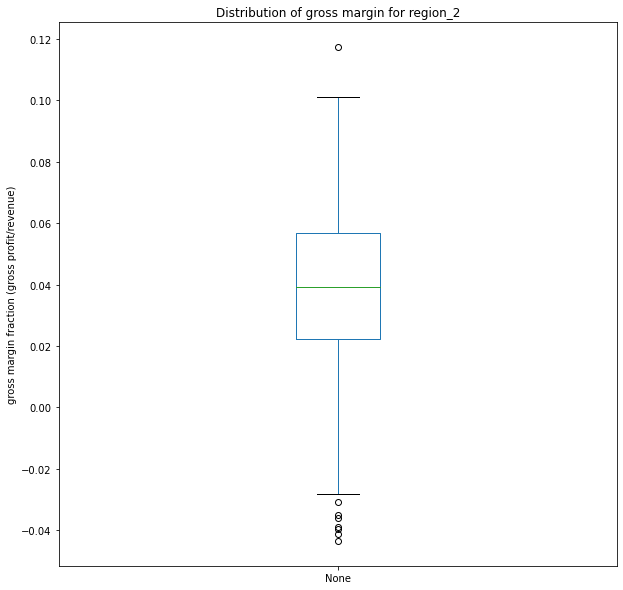

In [48]:
gross_margin_2.plot(kind='box', figsize=(10,10))
plt.ylabel('gross margin fraction (gross profit/revenue)')
plt.title('Distribution of gross margin for region_2')
plt.show()

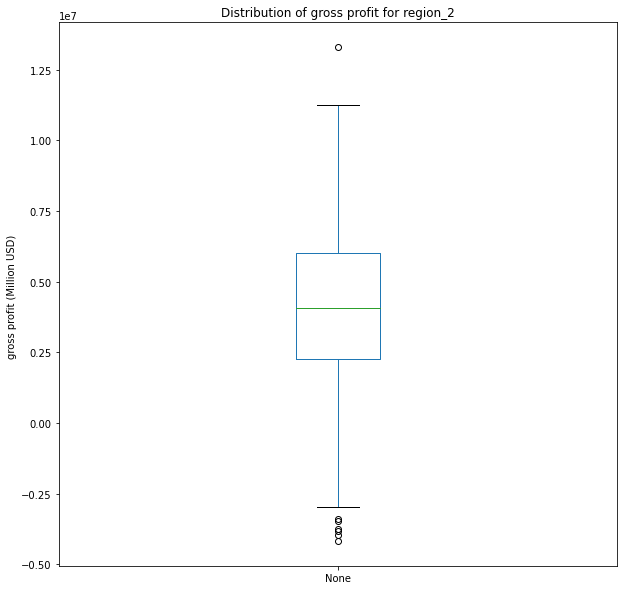

In [49]:
gross_profit_2.plot(kind='box', figsize=(10,10))
plt.ylabel('gross profit (Million USD) ')
plt.title('Distribution of gross profit for region_2')
plt.show()

In this section, we analyzed the risk of loss percentage and 95% confidence interval for gross profit and gross profit margin for region_2. For region_2, we calculated that there was a 7.6% risk of negative profit profit margin. Also, the 95% confidence interval for gross margin profit was (-0.016, 0.086); and the the 95% confidence interval for gross profit was (-1633504.13, 9503595.74).

In [50]:
#calculating risk percentage
risk_count_2=0
for i in gross_margin_2:
    if i <0:
        risk_count_2 +=1

print(f'Risk percentage {(risk_count_2/len(gross_margin_2))*100}%')

Risk percentage 7.6%


In [51]:
print(f'gross profit 95% C.I.: ({gross_profit_2.quantile(0.025)} , {gross_profit_2.quantile(0.975)})')
print(f'gross profit margin 95% C.I.: ({gross_margin_2.quantile(0.025)} , {gross_margin_2.quantile(0.975)})')

gross profit 95% C.I.: (-1633504.1339560263 , 9503595.749237984)
gross profit margin 95% C.I.: (-0.016606307481400732 , 0.0867879784964295)


## General Conclusion 

From the section of `Sufficient volumen units for profit`, we found that the three regions had, on average, enough volume units of product from the wells that had volume units higher than 75% quartile in their distribution. The table below summarizes the findings from the bootstrapping methiod if 1000 subsamples with selecting the highest volume units in 200 wells. 


|region  | average gross profit (USD) | average gross profit margin | average volume per well |
|--------|----------------------------|-----------------------------|-------------------------|
|Region 0|1.977462e+07                |0.165065                     |133.08                   |
|Region 1|2.353659e+07                |0.190523                     |137.26                   |
|Region 2|1.667743e+07                |0.142910                     |129.64                   |

From the `profit and risk` section, we analyzed by means of bootstrapping method the gross profit, gross profit margin, and the risk of loss percentage from 1000 subsamples of each region, with keeping the highest predicted volumne of 200 wells, and selecting the corresponding correct volume units for the wells. The findings can be summarized from the table below: 

|region  | average gross profit (USD) | average gross profit margin | 95% C.I of Gross Profit Margin |
|--------|----------------------------|-----------------------------|--------------------------------|
|Region 0|3.961650e+06                |0.037474                     |(-0.0112, 0.0833)               |
|Region 1|4.560451e+06                |0.043237                     |(0.0033, 0.078)                 |
|Region 2|4.044039e+06                |0.038203                     |(-0.016, 0.086)                 |


|region  |95% C.I. of Gross Profit    |Risk of Loss percentage(%) |
|--------|----------------------------|---------------------------|
|Region 0|(-1112155.45 ,9097669.41)   |6.9%                       |
|Region 1|(338205.09 , 8522894.53)    |1.5%                       |
|Region 2|(-1633504.13, 9503595.74)   |7.6%                       |

From these findings, we selected region 1 for the construction of oil wells, as it presented a higher, on average, gross profit margin and gross profit margin, compared to region 0 and 2. Also, regions 0 and 2 presented risk of loss percentages higher than 2.5%; therefore, these regions were discarded. 